# Modeling - Random Forest Classifier
___

#

### Imports
---

In [14]:
#Import all Libraries, Transformers, Models, and Plotting Tools

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer 

#

### Data and Features
___

In [22]:
# Read in Clean Combined Data Frame
df = pd.read_csv('./data/df.csv')

#Set X and y Variables
X = df[['lemma_text']] 
y = df['poker']

#Train/Test/Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

#Getting Baseline
y.value_counts(normalize=True)

0    0.588988
1    0.411012
Name: poker, dtype: float64

#

### Modeling
___

In [16]:
#instantiating count vectorizer 
cvec=CountVectorizer(stop_words='english')

#Instantiating Stopwords and adding additional words added to stopwords list after initial word count EDA
nltk.download('stopwords')
stopwords = stopwords.words('english')
stop_list = ["dad","poker", "say", "joke"] 
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(stop_list)

#Creating a Column Transformer to Model Non Sentiment Columns with Count Vectorizer
ct1=make_column_transformer(
    (cvec, 'lemma_text'), 
    remainder='passthrough'
)

#Creating a Pipeline with Model 
transformer_pipe1 = Pipeline([
    ('ct1',ct1),
    ('rf',RandomForestClassifier())
])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/preetsekhon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#Fitting Transformer on Training Set 
transformer_pipe1.fit(X_train, y_train)

Pipeline(steps=[('ct1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('countvectorizer',
                                                  CountVectorizer(stop_words='english'),
                                                  'lemma_text')])),
                ('rf', RandomForestClassifier())])

In [18]:
#Scoring Data on Training Set
transformer_pipe1.score(X_train, y_train)

1.0

In [19]:
#Scoring Data on Test Set
transformer_pipe1.score(X_test, y_test)

0.9739114458938085

In [20]:
# Get Predictions
preds_pipe = transformer_pipe1.predict(X_test)

# Calculate the specificity and precision
print(classification_report(y_test, preds_pipe, target_names=['Dad Jokes', 'Poker']))

              precision    recall  f1-score   support

   Dad Jokes       0.96      1.00      0.98      3206
       Poker       0.99      0.94      0.97      2237

    accuracy                           0.97      5443
   macro avg       0.98      0.97      0.97      5443
weighted avg       0.97      0.97      0.97      5443



/Users/preetsekhon/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


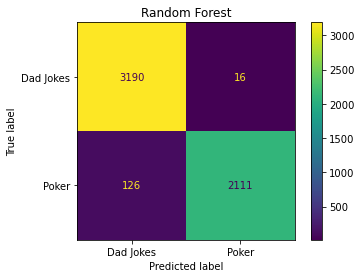

In [21]:
#Plotting Confusion Matrix and Saving Plot to Folder
plot_confusion_matrix(transformer_pipe1,X_test,y_test,display_labels=['Dad Jokes','Poker'])
plt.title('Random Forest')
plt.savefig('visuals/RF_CM.jpeg',dpi=300, bbox_inches = "tight")
plt.show();